In [165]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt 
%matplotlib inline

In [166]:
def U(x):
    return x

In [167]:
a = 1
b = 2
n = 100


In [168]:
x = np.linspace(a,b, num = n)
step = x[1] - x[0]
x

array([1.        , 1.01010101, 1.02020202, 1.03030303, 1.04040404,
       1.05050505, 1.06060606, 1.07070707, 1.08080808, 1.09090909,
       1.1010101 , 1.11111111, 1.12121212, 1.13131313, 1.14141414,
       1.15151515, 1.16161616, 1.17171717, 1.18181818, 1.19191919,
       1.2020202 , 1.21212121, 1.22222222, 1.23232323, 1.24242424,
       1.25252525, 1.26262626, 1.27272727, 1.28282828, 1.29292929,
       1.3030303 , 1.31313131, 1.32323232, 1.33333333, 1.34343434,
       1.35353535, 1.36363636, 1.37373737, 1.38383838, 1.39393939,
       1.4040404 , 1.41414141, 1.42424242, 1.43434343, 1.44444444,
       1.45454545, 1.46464646, 1.47474747, 1.48484848, 1.49494949,
       1.50505051, 1.51515152, 1.52525253, 1.53535354, 1.54545455,
       1.55555556, 1.56565657, 1.57575758, 1.58585859, 1.5959596 ,
       1.60606061, 1.61616162, 1.62626263, 1.63636364, 1.64646465,
       1.65656566, 1.66666667, 1.67676768, 1.68686869, 1.6969697 ,
       1.70707071, 1.71717172, 1.72727273, 1.73737374, 1.74747

In [169]:
def kinetic_energy(n):
    kinetic_energy_matrix = np.zeros((n-2)**2).reshape(n-2,n-2)

    for i in range(n-2):
        for j in range(n-2):
            if i == j:
                kinetic_energy_matrix[i][j] = -2
            elif np.abs(i-j) == 1:
                kinetic_energy_matrix[i][j] = 1
            else:
                kinetic_energy_matrix[i][j] = 0

    return kinetic_energy_matrix

kinetic_energy(n)


array([[-2.,  1.,  0., ...,  0.,  0.,  0.],
       [ 1., -2.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1., -2., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., -2.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1., -2.,  1.],
       [ 0.,  0.,  0., ...,  0.,  1., -2.]])

In [170]:
def potential_energy(n):
    potential_energy_matrix = np.zeros((n-2)**2).reshape(n-2,n-2)

    for i in range(n-2):
        for j in range(n-2):
            if i == j:
                potential_energy_matrix[i][j] = U(x[i + 1])

            else:
                potential_energy_matrix[i][j] = 0

    return potential_energy_matrix

potential_energy(n)


array([[1.01010101, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.02020202, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.03030303, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.96969697, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.97979798,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.98989899]])

In [171]:
hamiltonian = kinetic_energy(n)/(2*step**2) + potential_energy(n)
hamiltonian

array([[-9799.98989899,  4900.5       ,     0.        , ...,
            0.        ,     0.        ,     0.        ],
       [ 4900.5       , -9799.97979798,  4900.5       , ...,
            0.        ,     0.        ,     0.        ],
       [    0.        ,  4900.5       , -9799.96969697, ...,
            0.        ,     0.        ,     0.        ],
       ...,
       [    0.        ,     0.        ,     0.        , ...,
        -9799.03030303,  4900.5       ,     0.        ],
       [    0.        ,     0.        ,     0.        , ...,
         4900.5       , -9799.02020202,  4900.5       ],
       [    0.        ,     0.        ,     0.        , ...,
            0.        ,  4900.5       , -9799.01010101]])

In [172]:
E_value, E_func = np.linalg.eig(hamiltonian)
print(E_value)
print(E_func)

[-1.95955678e+04 -1.95807668e+04 -1.95561199e+04 -1.95216489e+04
 -1.94773884e+04 -1.94233831e+04 -1.93596873e+04 -1.92863652e+04
 -1.91111470e+04 -1.90094273e+04 -1.88984341e+04 -1.87782790e+04
 -1.86490830e+04 -1.85109762e+04 -1.83640977e+04 -1.82085954e+04
 -1.78723542e+04 -1.76919538e+04 -1.75036064e+04 -1.73075016e+04
 -1.71038369e+04 -1.68928173e+04 -1.66746554e+04 -1.64495707e+04
 -1.57350805e+04 -3.43219283e+00 -1.82332374e+01 -1.54846378e+04
 -4.28800760e+01 -7.73511175e+01 -1.52284705e+04 -1.21611610e+02
 -1.49668368e+04 -1.75616950e+02 -2.39312741e+02 -3.12634841e+02
 -1.47000000e+04 -1.44282288e+04 -4.87853016e+02 -5.89572657e+02
 -7.00565917e+02 -8.20721033e+02 -1.41517969e+04 -9.49917019e+02
 -1.08802379e+03 -1.23490227e+03 -1.32973419e+04 -1.30050931e+04
 -1.27096166e+04 -1.39040458e+03 -1.24112098e+04 -2.92434463e+03
 -2.70618270e+03 -3.14942926e+03 -2.49516314e+03 -4.11436223e+03
 -3.86391946e+03 -1.21101733e+04 -2.09539363e+03 -1.90704622e+03
 -4.37052946e+03 -4.63216

In [173]:
Eigen_value = np.argsort(E_value, axis = 0)
Eigen_value = Eigen_value[:1]
Eigen_value

array([0], dtype=int64)

Making the energies dimensionless


In [174]:
energies = E_value[Eigen_value]/E_value[Eigen_value][0]
print(energies)

[1.]


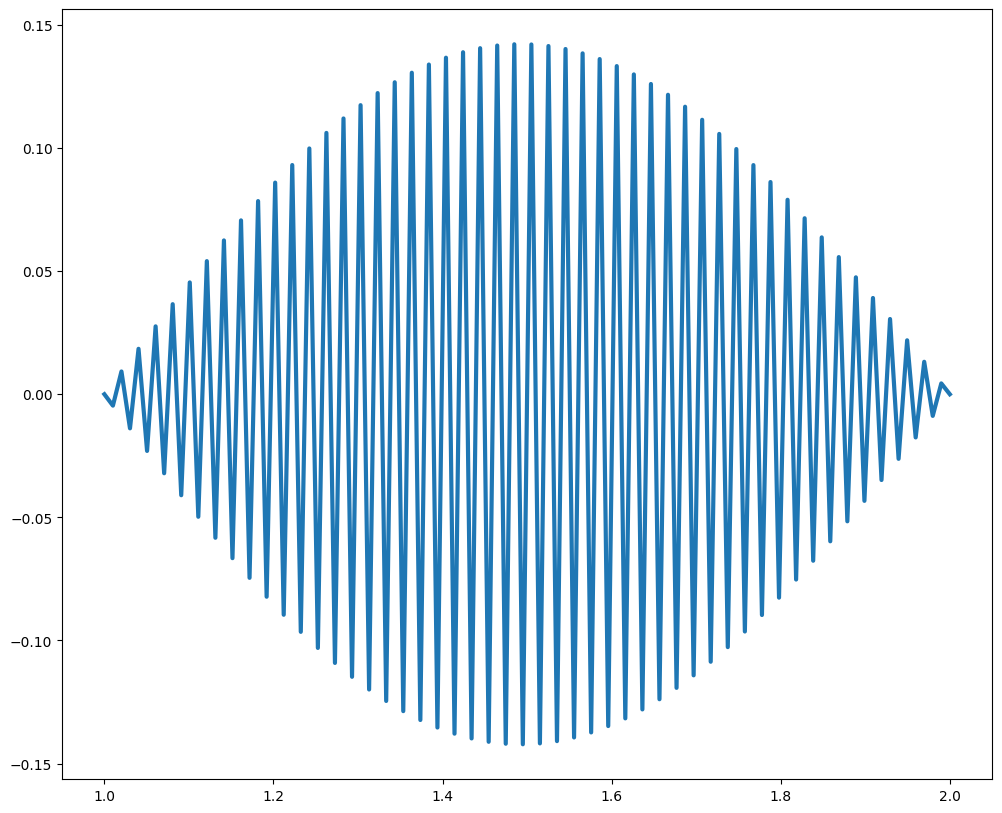

In [175]:
plt.figure(figsize=(12,10))
for i in range(len(Eigen_value)):
    y = []
    y = np.append(y,E_func[:,Eigen_value[i]])
    y = np.append(y,0)
    y = np.insert(y,0,0)


plt.plot(x,y, lw = 3)
